In [1]:
import os
import sys
import yaml

import pandas as pd

from network_wrangler import RoadwayNetwork
from network_wrangler import TransitNetwork
from network_wrangler import ProjectCard
from network_wrangler import Scenario
from network_wrangler import WranglerLogger

from lasso import ModelRoadwayNetwork

In [2]:
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [3]:
import logging
logger = logging.getLogger("WranglerLogger")
logger.handlers[0].stream = sys.stdout
# if you don't want to see so much detail, set to logging.INFO or DEBUG
logger.setLevel(logging.DEBUG)

## Read a Config File

Stored as `my_config` variable

In [4]:
MY_CONFIG_FILE = os.path.join(
    os.path.dirname(os.path.abspath('')), "examples", "settings","my_config.yaml"
)

with open(MY_CONFIG_FILE) as f:
        my_config = yaml.safe_load(f)
        
import json
print(json.dumps(my_config, indent=2))

## Alternatively this could be written in the notebook our selected via a notebook GUI

{
  "base_scenario": {
    "input_dir": "examples/stpaul",
    "shape_file_name": "shape.geojson",
    "link_file_name": "link.json",
    "node_file_name": "node.geojson",
    "transit_directory": "",
    "validate_network": false
  },
  "scenario": {
    "project_cards_filenames": [],
    "card_directory": "examples/stpaul/project_cards",
    "glob_search": "*simple*.yml",
    "tags": []
  },
  "output": {
    "format": "geojson",
    "directory": "",
    "prefix": ""
  }
}


## Create a Base Scenario

In [5]:
base_wrangler_path = os.path.join(os.path.dirname((os.path.dirname(os.path.abspath('')))),"network_wrangler")
WranglerLogger.info("Base Wrangler Path: {}".format(base_wrangler_path))

base_scenario = Scenario.create_base_scenario(
        my_config["base_scenario"]["shape_file_name"],
        my_config["base_scenario"]["link_file_name"],
        my_config["base_scenario"]["node_file_name"],
        base_dir=os.path.join(base_wrangler_path,my_config["base_scenario"]["input_dir"]),
    )

2019-11-21 16:56:22, INFO: Base Wrangler Path: /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler
2019-11-21 16:56:22, INFO: Reading from following files:
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/link.json
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/node.geojson
-/Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/shape.geojson.
2019-11-21 16:56:54, INFO: Read 2054339 links from /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/link.json
2019-11-21 16:56:54, INFO: Read 205908 nodes from /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/node.geojson
2019-11-21 16:56:54, INFO: Read 331345 shapes from /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/shape.geojson
2019-11-21 16:56:54, INFO: Removing calendar.txt from trans

#### Create project cards from projects that are explicitely specified in config


In [6]:
if len(my_config["scenario"]["project_cards_filenames"]) > 0:
    project_cards_list = [
        ProjectCard.read(filename, validate=False)
        for filename in my_config["scenario"]["project_cards_filenames"]
    ]
else: 
    project_cards_list = []
project_cards_list

[]

## Create Scenario

In [7]:
my_scenario = None
my_scenario = Scenario.create_scenario(
    base_scenario=base_scenario,
    card_directory=os.path.join(base_wrangler_path,my_config["scenario"]["card_directory"]),
    tags=my_config["scenario"]["tags"],
    project_cards_list=project_cards_list,
    glob_search=my_config["scenario"]["glob_search"],
    validate_project_cards=False,
)

2019-11-21 16:57:04, INFO: Creating Scenario
2019-11-21 16:57:04, DEBUG: Adding project cards from directory.
Dir: /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/project_cards
2019-11-21 16:57:04, DEBUG: Adding project cards using glob search: *simple*.yml
2019-11-21 16:57:04, DEBUG: Trying to add project card from file: /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/project_cards/9_simple_transit_attribute_change.yml
2019-11-21 16:57:04, DEBUG: Adding project card to scenario: Improve Express Bus Frequency
2019-11-21 16:57:04, DEBUG: Adding project card dependencies
2019-11-21 16:57:04, DEBUG: Trying to add project card from file: /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/network_wrangler/examples/stpaul/project_cards/1_simple_roadway_attribute_change.yml
2019-11-21 16:57:04, DEBUG: Adding project card to scenario: 6th St E Road Diet
2019-11-21 16:57:04, DEBUG: Adding project card depende

### Apply all projects in scenario

In [8]:
my_scenario.get_project_names()

['Improve Express Bus Frequency',
 '6th St E Road Diet',
 'test simple roadway add',
 'Blue Line Service Enhancement C',
 'test managed lane project',
 'Blue Line Service Enhancement A']

In [9]:
my_scenario.apply_all_projects()

2019-11-21 16:57:04, DEBUG: Ordered Project Cards: {'blue line service enhancement a': <network_wrangler.ProjectCard.ProjectCard object at 0x11614f0f0>, 'test managed lane project': <network_wrangler.ProjectCard.ProjectCard object at 0x11beda908>, 'blue line service enhancement c': <network_wrangler.ProjectCard.ProjectCard object at 0x11c556d68>, 'test simple roadway add': <network_wrangler.ProjectCard.ProjectCard object at 0x11bedacf8>, '6th st e road diet': <network_wrangler.ProjectCard.ProjectCard object at 0x11c55e5f8>, 'improve express bus frequency': <network_wrangler.ProjectCard.ProjectCard object at 0x11beea908>}
2019-11-21 16:57:04, DEBUG: Project Cards: [<network_wrangler.ProjectCard.ProjectCard object at 0x11614f0f0>, <network_wrangler.ProjectCard.ProjectCard object at 0x11beda908>, <network_wrangler.ProjectCard.ProjectCard object at 0x11c556d68>, <network_wrangler.ProjectCard.ProjectCard object at 0x11bedacf8>, <network_wrangler.ProjectCard.ProjectCard object at 0x11c55e5f8

In [10]:
my_scenario.applied_projects

['Blue Line Service Enhancement A',
 'test managed lane project',
 'Blue Line Service Enhancement C',
 'test simple roadway add',
 '6th St E Road Diet',
 'Improve Express Bus Frequency']

# Write out as MetCouncil Model Network

In [46]:
model_road_net = ModelRoadwayNetwork.from_RoadwayNetwork(
    my_scenario.road_net, parameters=my_config.get("my_parameters", {})
)

In [29]:
print("\n".join(model_road_net.links_df.columns))

model_link_id
osm_link_id
shstReferenceId
shstGeometryId
u
v
A
B
access
area
bridge
highway
length
maxspeed
name
oneway
tunnel
width
lanes
distance
HOV_access
transit_priority
traveltime_assert
transit_access
drive_access
walk_access
bike_access
transit_walk_access
locationReferences
ref
geometry
ML
ML_lanes
ML_price
ML_access
ML_egress


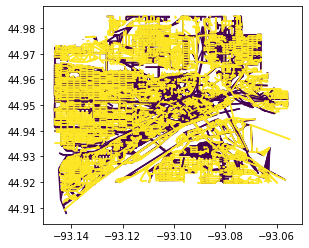

In [30]:
model_road_net.links_df.plot("bike_access")

In [47]:
model_road_net.roadway_standard_to_met_council_network()

2019-11-22 09:07:11, INFO: Renaming roadway attributes to be consistent with what metcouncil's model is expecting
2019-11-22 09:07:11, INFO: Creating network with duplicated managed lanes
2019-11-22 09:07:12, INFO: Calculating additional variables
2019-11-22 09:07:12, INFO: Creating calculated roadway variables.
2019-11-22 09:07:12, INFO: Calculating Area Type from Spatial Data and adding as roadway network variable: area_type
2019-11-22 09:07:12, DEBUG: Reading Area Type Shapefile /Users/elizabeth/Documents/urbanlabs/MetCouncil/working/client_met_council_wrangler_utilities/metcouncil_data/area_type/ThriveMSP2040CommunityDesignation.shp
2019-11-22 09:07:17, DEBUG: Area Type Codes Used: {23: 4, 24: 3, 25: 2, 35: 2, 36: 1, 41: 1, 51: 1, 52: 1, 53: 1, 60: 1}
2019-11-22 09:07:17, INFO: Finished Calculating Area Type from Spatial Data into variable: area_type
2019-11-22 09:07:17, INFO: Adding roadway network variable for county: county
2019-11-22 09:07:21, INFO: Calculating Centroid Connect

In [52]:
model_road_net.write_roadway_as_shp()

2019-11-22 09:26:50, INFO: Writing Network as Shapefile
2019-11-22 09:26:50, INFO: Renaming roadway attributes to be consistent with what metcouncil's model is expecting
2019-11-22 09:26:50, INFO: Creating network with duplicated managed lanes
2019-11-22 09:26:50, ERROR: managed lane access links already exist in network; shouldn't be running create managed lane network. Returning network as-is.
2019-11-22 09:26:50, INFO: Calculating additional variables
2019-11-22 09:26:50, INFO: Creating calculated roadway variables.
2019-11-22 09:26:50, INFO: Area Type Variable 'area_type' already in network. Returning without overwriting.
2019-11-22 09:26:50, INFO: County Variable 'county' already in network. Returning without overwriting.
2019-11-22 09:26:50, INFO: Centroid Connector Variable 'centroid_connector' already in network. Returning without overwriting.
2019-11-22 09:26:50, INFO: MPO Variable 'mpo' already in network. Returning without overwriting.
2019-11-22 09:26:50, INFO: Adding Count

NameError: name 'copy' is not defined